<a href="https://colab.research.google.com/github/FIngul98/Credit_Default_Project/blob/main/EDA_of_Random_Forest_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Default Prediction 

##### Dataset: 


### Import libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read dataset

In [2]:
url = 'https://raw.githubusercontent.com/FIngul98/Loan_Dataset/main/loan_data.csv'
loan_data= pd.read_csv(url)
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Exploratory Data Analysis 


In [ ]:
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Dataframe cleanup
loan_data.columns = [c.replace('.', '_') for c in loan_data.columns]


In [ ]:
loan_data.head(5)

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
loan_features = loan_data[['int_rate', 'installment', 'log_annual_inc', 'dti', 'fico', 'days_with_cr_line', 'revol_bal',
                           'revol_util','not_fully_paid']]


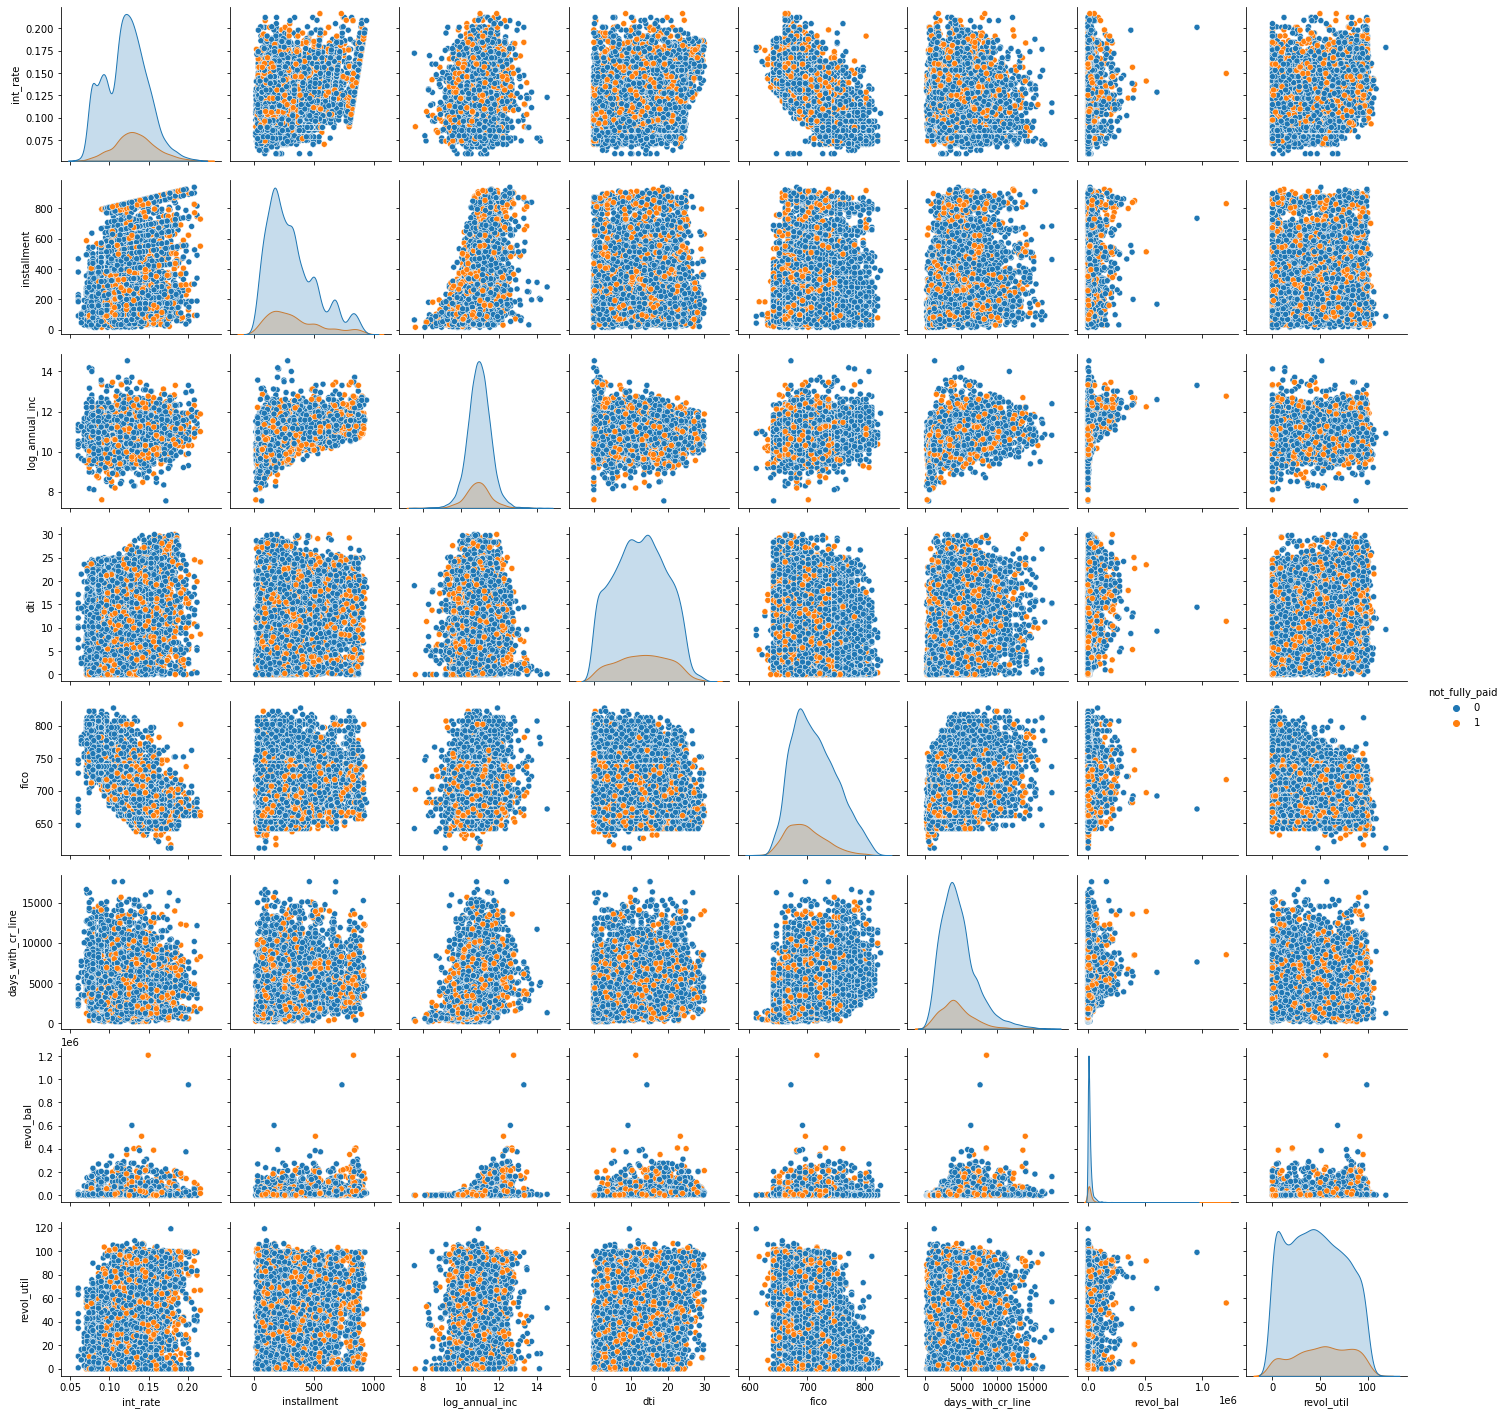

In [ ]:
sns.pairplot(data = loan_features, hue = 'not_fully_paid')

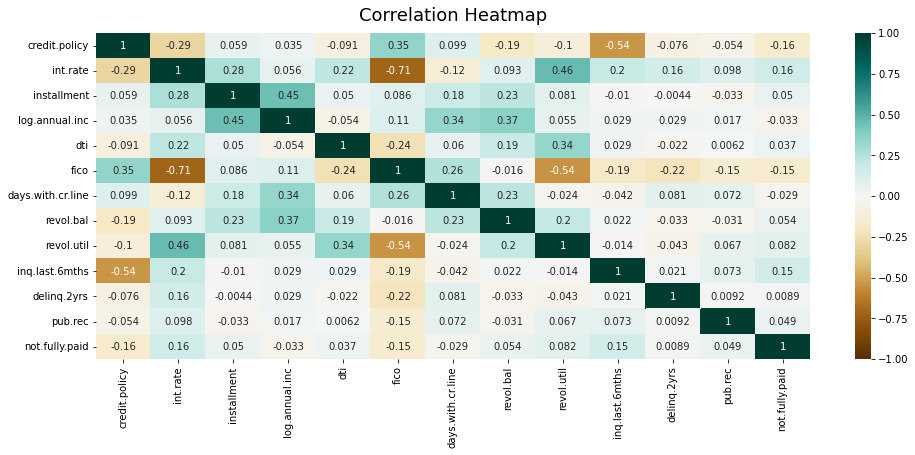

In [3]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(loan_data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

###

In [ ]:
le = LabelEncoder()
le.fit(loan_data["purpose"])
loan_data["purpose"]= le.transform(loan_data["purpose"])
loan_data.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
#Here we are preparing to split the data by defining our target value.
y = loan_data['not_fully_paid']
y

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not_fully_paid, Length: 9578, dtype: int64

In [ ]:
#Tran_test split is done before exploratory data analysis
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# X_test data set is downloaded and set aside from the model for now
X_test.to_csv('./X_test_data.csv')

In [ ]:
# y_test data set is downloaded and set aside from the model for now
y_test.to_csv('./y_test_data.csv')

In [ ]:
#All our features appear to follow normal distribution except "revol_bal." We have to feature engineer "revol_bal" in our next step.
#Refer to Decision Tree model for visualization.
loan_data['log_revol_bal'] = np.log(loan_data['revol_bal'])
loan_data.drop(columns='revol_bal', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
#We create loan_ros for the after over-sampling data.
loan_ros = loan_data[['credit_policy', 'int_rate', 'installment',	'log_annual_inc', 'dti', 'fico', 'days_with_cr_line',	'revol_util',	'inq_last_6mths',	'delinq_2yrs', 'pub_rec', 'log_revol_bal', 'not_fully_paid']]
print(loan_ros['not_fully_paid'].value_counts(), "\n")

0    8045
1    1533
Name: not_fully_paid, dtype: int64 



In [ ]:
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


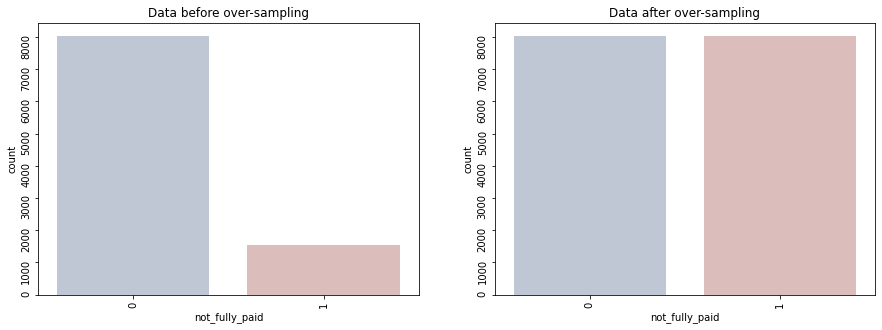

Data before over-sampling
0    8045
1    1533
Name: not_fully_paid, dtype: int64 

Data after over-sampling
0    8045
1    8045
Name: not_fully_paid, dtype: int64


In [ ]:
# over-sampling. We define X and y for loan_ros using the iloc function.
X = loan_ros.iloc[:,:-1]
y = loan_ros.iloc[:,-1]

ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X, y)

loan_ros = x_ros
loan_ros['not_fully_paid'] = y_ros


#Now we want to visualize the after and before over-sampling data.
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.countplot('not_fully_paid', data=loan_data, ax=ax[0], palette="vlag")
ax[0].tick_params(labelrotation=90)
ax[0].set_title("Data before over-sampling")

sns.countplot('not_fully_paid', data=loan_ros, ax=ax[1], palette="vlag")
ax[1].tick_params(labelrotation=90)
ax[1].set_title("Data after over-sampling")

plt.show()

print("Data before over-sampling")
print(loan_data['not_fully_paid'].value_counts(), "\n")

print("Data after over-sampling")
print(loan_ros['not_fully_paid'].value_counts())

In [ ]:
#RandomOverSampler corrects the imbalance between 0's and 1's
loan_ros.value_counts('not_fully_paid')

not_fully_paid
0    8045
1    8045
dtype: int64

In [ ]:
#Specifying what type of values our data set includes. This will make our fit and the RFE model easier
types = loan_data.select_dtypes(['int64', 'float64', 'bool']).columns

In [ ]:
#Importing our test data set
X_test = pd.read_csv('/content/X_test_data.csv')

In [ ]:
#Removing the column "Unnamed"
X_test.drop(columns='Unnamed: 0', axis=1, inplace=True)


In [ ]:
#Importing our test data set
y_test = pd.read_csv('/content/y_test_data.csv')

In [ ]:
#Removing the column "Unnamed"
y_test.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [ ]:
#Modifying the scale of feature "revol_bal" to a log scale for it to follow normal distribution.
X_test['log_revol_bal'] = np.log(X_test['revol_bal'])
X_test.drop(columns='revol_bal', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
#Importing RFE model
from sklearn.feature_selection import RFE

In [ ]:
#Here we are defining our model and reiterating the X and y features.
loan_model = loan_ros
X = loan_model.iloc[:,:-1].values
y = loan_model.iloc[:,-1].values

In [ ]:
#When we were feature engineering the log_revol_bal would give us infinity values.
#The solution is to substitute with standardized value using the formula below
X_1 = np.nan_to_num(X, posinf=True, neginf=True)

In [ ]:
X_test = np.nan_to_num(X_test,posinf=True, neginf=True)

In [ ]:
#Checking to see if we are still getting infinity values, which we are not!
mean = np.mean(X_test)
median = np.median(X_test)
max = np.max(X_test)
 
#print("Array =", X_test)
print("Mean =", mean)
print("Median =", median)
print("Max =", max)

Mean = 471.2737735367681
Median = 9.2054283225658
Max = 16350.0


In [ ]:
#Here we are splitting the balanced data set to train the model on the new trained data set
#Further, we do not want to train the model on the new test set so we keep the old
X_train, X_test2, y_train, y_test2 = train_test_split(X_1, y, random_state=42)

In [ ]:
for i in range(1,13):

  select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=i)

  select.fit(X_train, y_train)

  mask = select.get_support()

  X_train_rfe = select.transform(X_train)
  X_test_rfe = select.transform(X_test)

  score = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

  print("Test score: {:.3f}".format(score), " number of features: {}".format(i))
  #Here we are testing the number of features for our model to find the optimal combination.

Test score: 0.802  number of features: 1
Test score: 0.949  number of features: 2
Test score: 0.970  number of features: 3
Test score: 0.975  number of features: 4
Test score: 0.980  number of features: 5
Test score: 0.985  number of features: 6
Test score: 0.987  number of features: 7
Test score: 0.984  number of features: 8
Test score: 0.983  number of features: 9
Test score: 0.985  number of features: 10
Test score: 0.986  number of features: 11
Test score: 0.984  number of features: 12


In [ ]:
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=8)

select.fit(X_train, y_train)

mask = select.get_support()

X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

print("Test score: {:.3f}".format(score), " number of features: {}".format(8))

features = pd.DataFrame({'features':list(loan_data[types].iloc[:,:-1].columns), 'select':list(mask)})
display(features.T)
features = list(features[features['select']==True]['features'])
print("The selected features are: " "\n")
display(features)

#We find that 8 features provide the highest test score!

Test score: 0.984  number of features: 8


,0,1,2,3,4,5,6,7,8,9,10,11
features,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
select,False,True,True,True,True,True,True,True,False,False,False,True


The selected features are: 



['int_rate',
 'installment',
 'log_annual_inc',
 'dti',
 'fico',
 'days_with_cr_line',
 'revol_util',
 'not_fully_paid']

In [ ]:
y_pred = select.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1987   25]
 [   4  379]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2012
           1       0.94      0.99      0.96       383

    accuracy                           0.99      2395
   macro avg       0.97      0.99      0.98      2395
weighted avg       0.99      0.99      0.99      2395



In [ ]:
#Precision 0.97, 0.99
#Our model results are much better than our performance metrics of 70% recall and 90% precision!
